# Dispenser Testing

## Setup

### Relevant Imports

In [1]:
import asyncio
from Scale import Scale
from ClearCore import ClearCore
from Dispenser import Dispenser
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
# from Phidget22.Phidget import *
# from Phidget22.Devices.VoltageRatioInput import *

### Instantiate Objects

In [2]:
s = Scale(716620)
m = ClearCore('192.168.1.12', 0, 6400)
# m = [ClearCore('192.168.1.12', i, 6400) for i in range(4)]
d = Dispenser(m, s)
await d.tare()

## Motor Commands

### Enable

In [13]:
await m.enable()

'\x02M0_'

### Jog

In [19]:
await m.enable()
await asyncio.sleep(0.25)
await m.jog(1500)

'\x02M01500'

### Disable

In [20]:
await m.stop()
await m.disable()

'\x02M0_'

### Clear Alerts

In [48]:
# await m.clear()
# await m.info()
for motor in m:
    # msg = await motor.info()
    # msg = await motor.jog(2000)
    msg = await motor.stop()
    # msg = await motor.clear()
    print(msg)

M0_
M1_
M2_
M3_


## Scale Commands

In [12]:
vin = VoltageRatioInput()
vin.openWaitForAttachment(2000)
sn = vin.getDeviceSerialNumber()
print(f"Serial Number: {sn}")

PhidgetException: PhidgetException 0x03 (Timed Out)
No Phidgets were detected at all. Make sure your device is attached.

### Weigh

In [4]:
await d.weigh(samples=1000, sample_rate=200)

-0.013285926821481553

### Calibrate

In [15]:
await d.calibrate(test_mass=393.8) # using tape measure

Place/move test mass and press Enter
Place/move test mass and press Enter
Place/move test mass and press Enter
Place/move test mass and press Enter
Remove test mass and press Enter
Calibration Successful


### Tare

In [3]:
await d.tare()

## Plot Data

### Plot Weight Data

STD:  1.33951336528286
Range: +/- 6.028988584372052


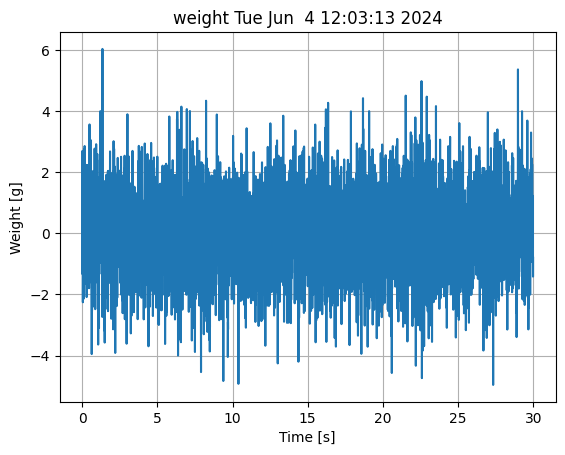

In [5]:
await d.test_true(duration=30, sample_rate=200)

Filterd range: ± 0.4 grams
Filtered std: σ= 0.1 grams


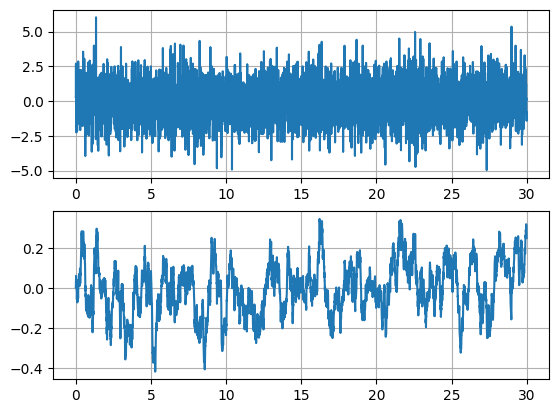

In [6]:
time = np.array(d.data['time'])
noisy_signal = np.array(d.data['weight'])
time -= min(time)
noisy_signal -= np.mean(noisy_signal)
cutoff = 0.5 # Hz
fs = 200
T = 1/fs
RC = 1/(cutoff*2*np.pi)
a = T/(T+RC)
b = RC/(T+RC)

filtered_signal = 0*noisy_signal
for i in range(len(noisy_signal)):
    filtered_signal[i] = a*noisy_signal[i] + b*filtered_signal[i-1]

fig, axs = plt.subplots(2, 1)
axs[0].plot(time, noisy_signal, label='Noisy Signal')
axs[0].grid(True)
axs[1].plot(time, filtered_signal, label='Filtered Signal')
axs[1].grid(True)

print('Filterd range: 'u"\u00B1"f' {(max(filtered_signal)-min(filtered_signal))/2:.1f} grams')
print('Filtered std: 'u'\u03C3'f'= {np.std(filtered_signal):.1f} grams')

### Plot Filter Data

STD:  0.13810042318028634
Range: +/- 1.1974782041612668


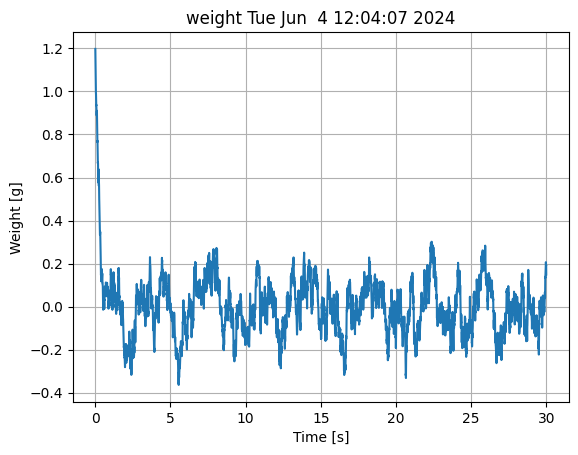

In [7]:
await d.test_filter(duration=30, sample_rate=200, cutoff=0.5)

### Plot Spectral Data

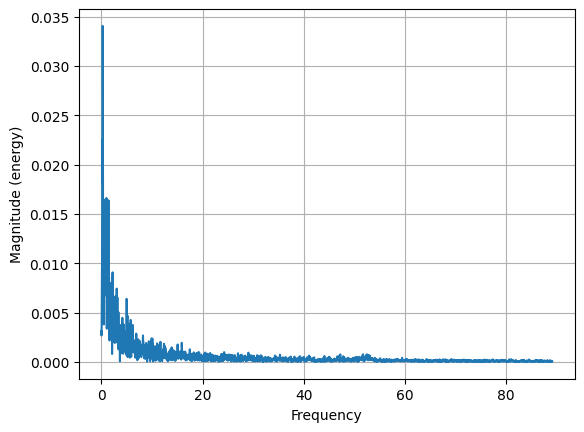

In [8]:
d.plot_spec()

## Dispensing

### Dispense

In [9]:
await d.dispense(serving=115, sample_rate=200, cutoff=0.5, rpm=300, offset=28, let_pass=3)

CancelledError: 

### Clear Dispenser

In [10]:
await m.enable()
await asyncio.sleep(1)
await m.jog(-2000)
await asyncio.sleep(30)
await m.stop()
await m.disable()

'\x02M0_'

In [37]:
await m.stop()
await m.disable()

'\x02M0_'

In [36]:
await m.enable()
await asyncio.sleep(.25)
await m.drive_write('JG300')

'\x02M0300'

In [6]:
s.data['c0']

[663.2177027254976,
 665.0064065975646,
 653.3129408411158,
 653.2435728239166,
 666.5721418429196,
 665.0609100396497,
 654.2642736484202,
 663.2177027254976,
 661.6123286131716,
 656.8903485852497,
 661.5330508792296,
 655.1165092882969,
 659.065531410284,
 657.9407785599816,
 661.3199919692604,
 661.3992697032024,
 655.77550545169,
 663.4010324852386,
 664.4365978848563,
 654.2246347814491,
 664.7437991038817,
 665.8685519541841,
 651.7571153125036,
 665.9478296881261,
 664.0897577988599,
 653.4169928669148,
 663.5893171033509,
 662.1573630340231,
 655.1016447131828,
 662.7915849055593,
 658.867337075429,
 660.3389300117278,
 657.0885429201048,
 656.1619844046573,
 662.9798695236716,
 655.195787022239,
 655.2998390480378,
 665.3780209754178,
 652.7679064202645,
 653.0305139139474,
 665.7496353532711,
 653.0850173560325,
 665.814048512099,
 665.273968949619,
 655.3642522068658,
 662.9897792404144,
 661.2010753683473,
 656.2412621385994,
 661.5578251710865,
 660.0317287927026,
 659.62